In [1]:
import time
import matplotlib.pyplot as plt

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [ ]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 2000
generations = 100
mutation_rate = 0.1
crossover_probability = 0.7
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size, mutation_rate, crossover_probability)

# Run optimzation and write to file

solution = ga.solve_tsp(tsp_data)
improvement = ga.population_fitness
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
print(improvement)
plt.plot(improvement)
plt.show()

In [ ]:
best = ga.population.take_best_chromosome()
print(best.get_products())
print(best.get_score())

In [ ]:
print(tsp_data.get_distances())
print(tsp_data.get_start_distances())
print(tsp_data.get_end_distances())

In [ ]:
from GeneticAlgorithm import Chromosome
from GeneticAlgorithm import Population

chromosome = Chromosome()
chromosome.create_chromosome(4)
print(chromosome.products)
distances = [
    [0, 1, 3, 6],
    [5, 0, 3, 2],
    [9, 4, 0, 8],
    [2, 6, 7 ,0]
]
# print(chromosome.fitness_function(distances))

population = Population(0.1, 0.7, tsp_data)
population.create_random_population(population_size, len(tsp_data.get_start_distances()))
print(population.chromosomes)
print(population.calculate_population_fitness())
print(ga.roulette(population))

### Part 2: Path Finding Through Ant Colony Optimization

In [ ]:
# Please keep your parameters for the ACO easily changeable here
no_ants = 20
no_gen = 50
q = 1000
evap = 0.4
# custom parameters
straight_factor = 0.7
max_steps = 1000000

# Construct the optimization objects
maze = Maze.create_maze("./../data/hard_maze.txt")

spec = PathSpecification.read_coordinates("./../data/hard_coordinates.txt")
aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, straight_factor, max_steps)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

In [ ]:
plt.plot(list(range(1, no_gen + 1)), list(map(lambda x: x.size(), best_routes)), label="best routes")
plt.plot(list(range(1, no_gen + 1)), avg_routes, '-.', label="average routes")

plt.xlabel("generation")
plt.ylabel("length of the path")

plt.legend()
plt.show()

In [ ]:
for i in range(maze.length):
    for j in range(maze.width): 
      v = maze.pheromones[j][i]
      if (v < 10):  print(int(v), end="   | ")
      elif (v < 100):  print(int(v), end="  | ")
      else: print(int(v), end=" | ")
    print()

Ready reading maze file ./../data/easy_maze.txt
Ready reading maze file ./../data/medium_maze.txt
Ready reading maze file ./../data/hard_maze.txt
easy 2
easy 5
easy 10
easy 15
easy 20
easy 25
easy 30
easy 50
easy 70


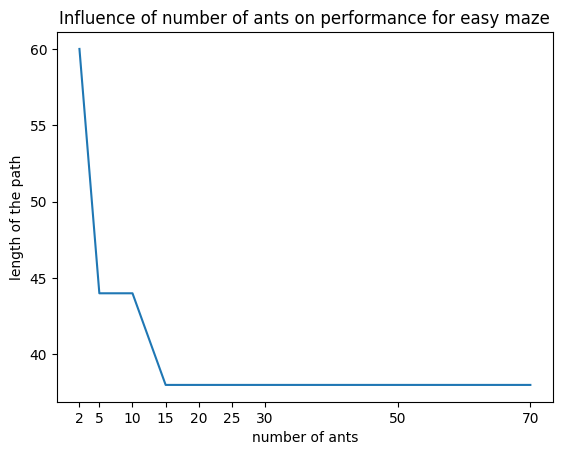

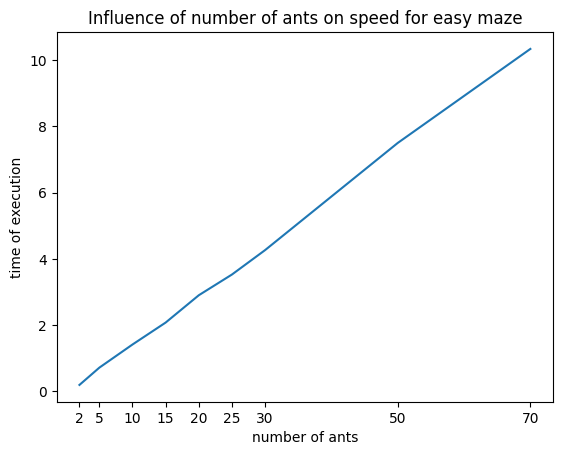

medium 2
medium 5
medium 10
medium 15
medium 20
medium 25
medium 30
medium 50
medium 70


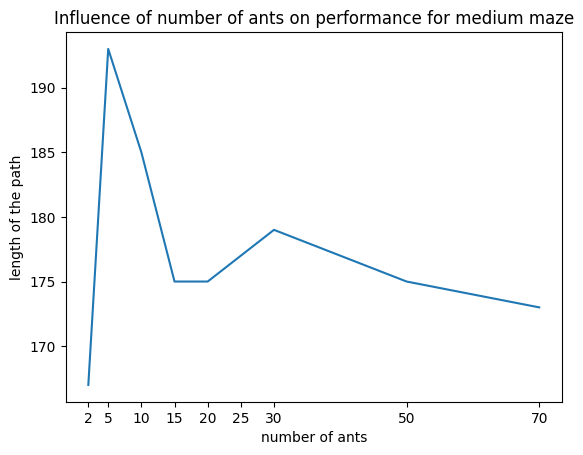

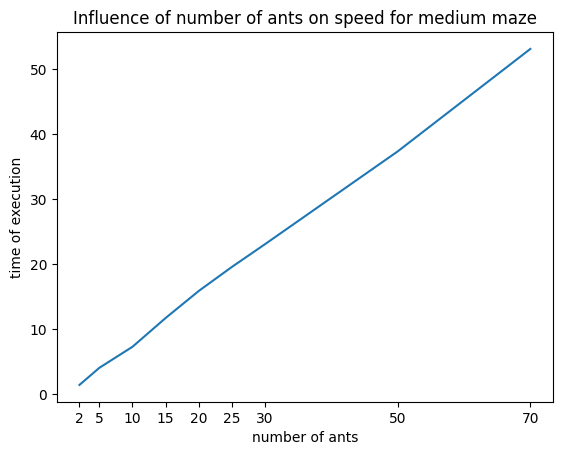

hard 2
hard 5
hard 10
hard 15
hard 20
hard 25
hard 30
hard 50
hard 70


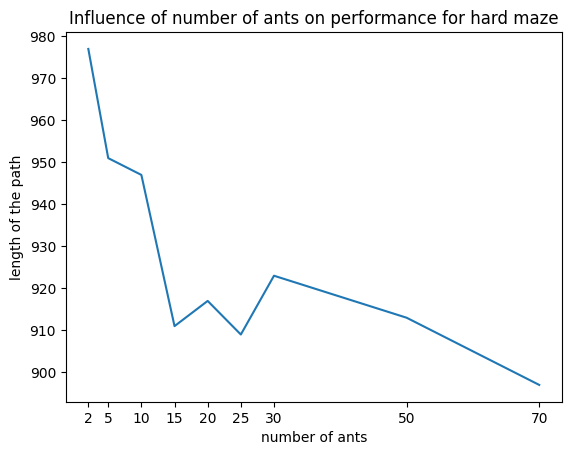

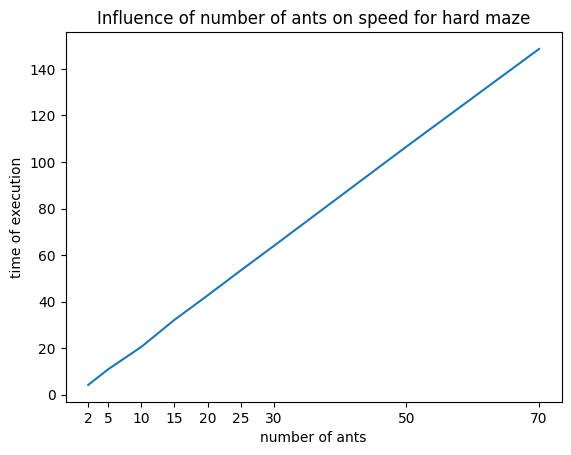

In [2]:
no_ants = 25
no_gen = 25
q = 1000
evap = 0.2
# custom parameters
straight_factor = 1
max_steps = 1000000

mazes = [Maze.create_maze("./../data/easy_maze.txt"), 
         Maze.create_maze("./../data/medium_maze.txt"), 
         Maze.create_maze("./../data/hard_maze.txt")]

specs = [PathSpecification.read_coordinates("./../data/easy_coordinates.txt"), 
         PathSpecification.read_coordinates("./../data/medium_coordinates.txt"), 
         PathSpecification.read_coordinates("./../data/hard_coordinates.txt")]

maze_types = ["easy", "medium", "hard"]

for maze, spec, maze_type in zip(mazes, specs, maze_types):

  best_solutions = []
  times = []

  parameters = [2, 5, 10, 15, 20, 25, 30, 50, 70]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, param, no_gen, q, evap, straight_factor, max_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    best_solutions.append(shortest_route.size())
    times.append((int(round(time.time() * 1000)) - start_time) / 1000.0)

  plt.plot(parameters, best_solutions)
  plt.xticks(parameters);

  plt.xlabel("number of ants")
  plt.ylabel("length of the path")
  plt.title("Influence of number of ants on performance for " + maze_type + " maze")

  plt.show()

  plt.plot(parameters, times)
  plt.xticks(parameters);

  plt.xlabel("number of ants")
  plt.ylabel("time of execution")
  plt.title("Influence of number of ants on speed for " + maze_type + " maze")

  plt.show()

Ready reading maze file ./../data/easy_maze.txt
Ready reading maze file ./../data/medium_maze.txt
Ready reading maze file ./../data/hard_maze.txt
easy 2
easy 5
easy 10
easy 15
easy 20
easy 30
easy 50
easy 100


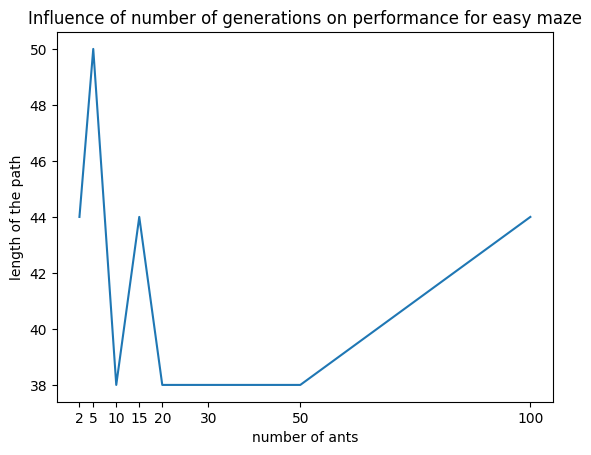

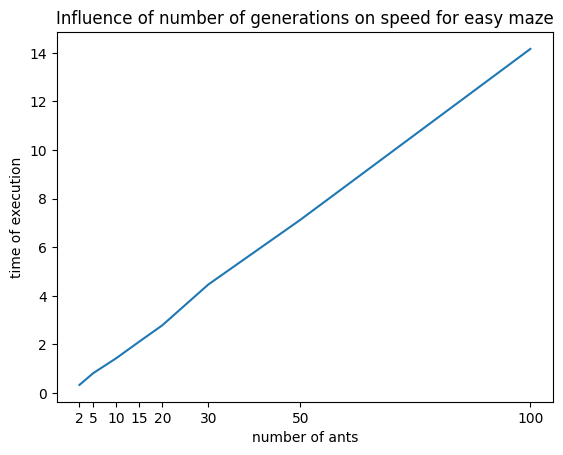

medium 2
medium 5
medium 10
medium 15
medium 20
medium 30
medium 50
medium 100


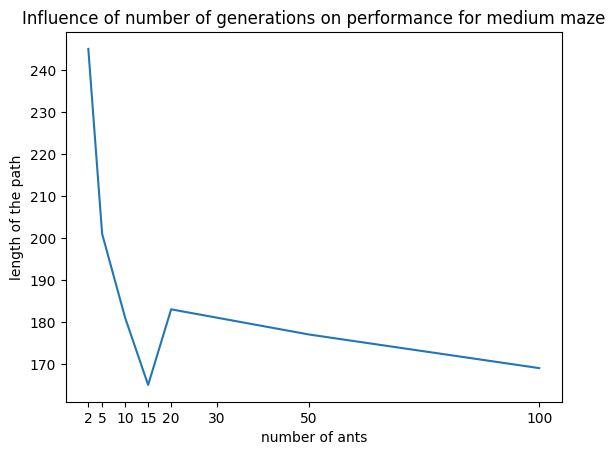

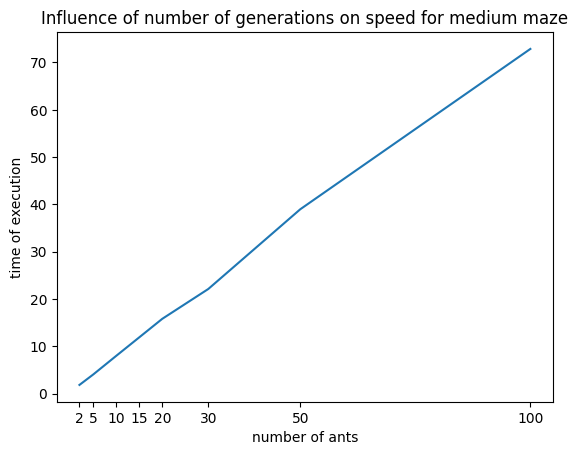

hard 2
hard 5
hard 10
hard 15
hard 20
hard 30
hard 50
hard 100


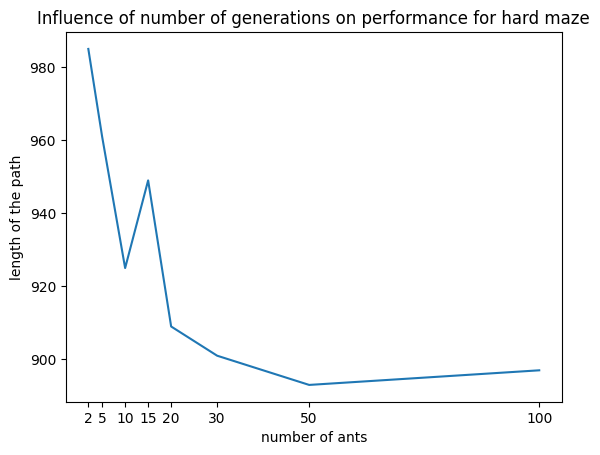

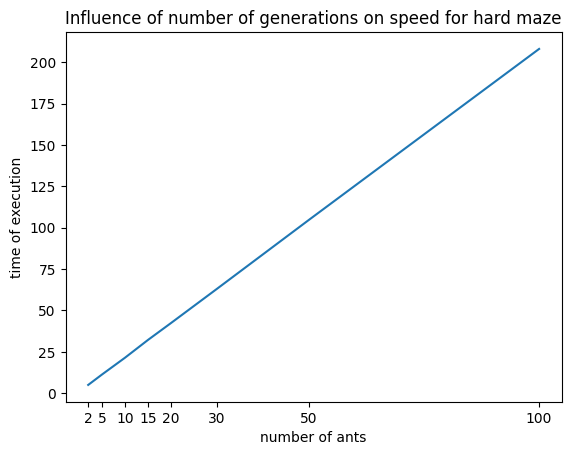

In [3]:
no_ants = 25
no_gen = 25
q = 1000
evap = 0.2
# custom parameters
straight_factor = 1
max_steps = 1000000

mazes = [Maze.create_maze("./../data/easy_maze.txt"), 
         Maze.create_maze("./../data/medium_maze.txt"), 
         Maze.create_maze("./../data/hard_maze.txt")]

specs = [PathSpecification.read_coordinates("./../data/easy_coordinates.txt"), 
         PathSpecification.read_coordinates("./../data/medium_coordinates.txt"), 
         PathSpecification.read_coordinates("./../data/hard_coordinates.txt")]

maze_types = ["easy", "medium", "hard"]

for maze, spec, maze_type in zip(mazes, specs, maze_types):

  best_solutions = []
  times = []

  parameters = [2, 5, 10, 15, 20, 30, 50, 100]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, param, q, evap, straight_factor, max_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    best_solutions.append(shortest_route.size())
    times.append((int(round(time.time() * 1000)) - start_time) / 1000.0)

  plt.plot(parameters, best_solutions)
  plt.xticks(parameters);

  plt.xlabel("number of ants")
  plt.ylabel("length of the path")
  plt.title("Influence of number of generations on performance for " + maze_type + " maze")

  plt.show()

  plt.plot(parameters, times)
  plt.xticks(parameters);

  plt.xlabel("number of ants")
  plt.ylabel("time of execution")
  plt.title("Influence of number of generations on speed for " + maze_type + " maze")

  plt.show()

Ready reading maze file ./../data/easy_maze.txt
Ready reading maze file ./../data/medium_maze.txt
Ready reading maze file ./../data/hard_maze.txt
easy 50
easy 100
easy 250
easy 500
easy 750
easy 1000
easy 1500
easy 2000
easy 2500


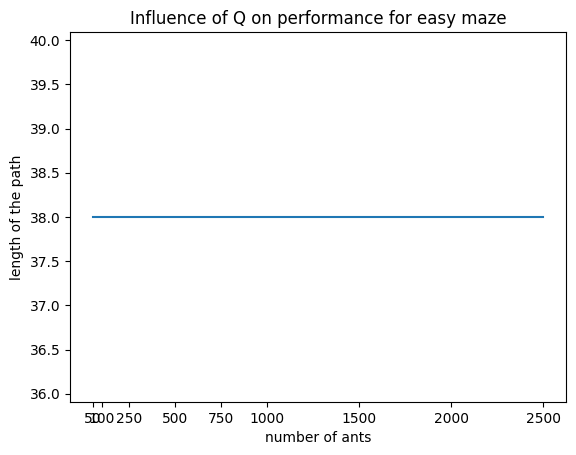

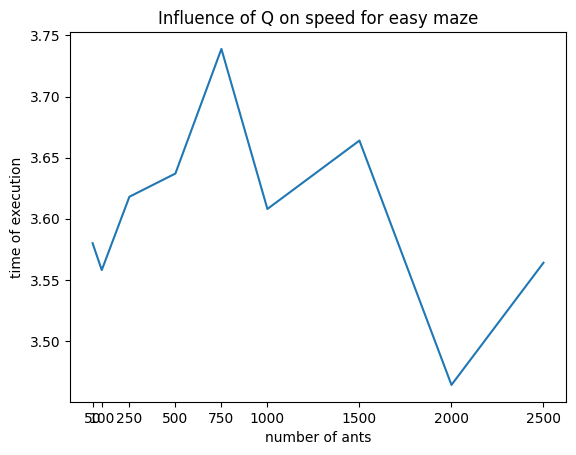

medium 50
medium 100
medium 250
medium 500
medium 750
medium 1000
medium 1500
medium 2000
medium 2500


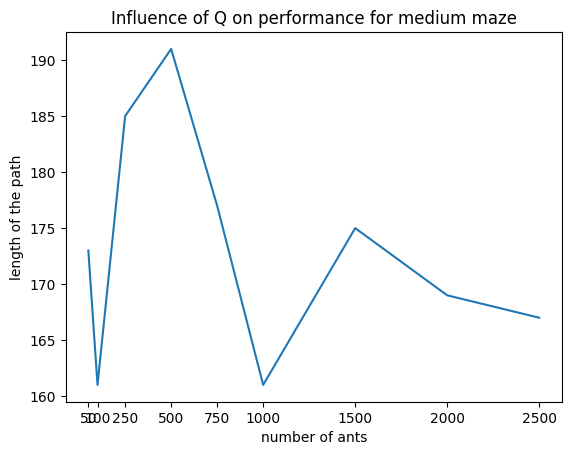

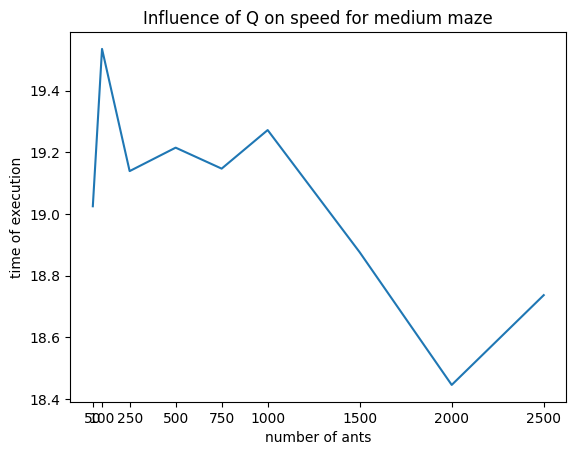

hard 50
hard 100
hard 250
hard 500
hard 750
hard 1000
hard 1500
hard 2000
hard 2500


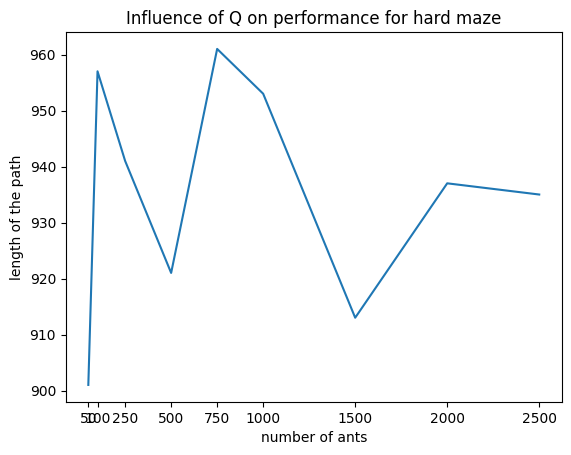

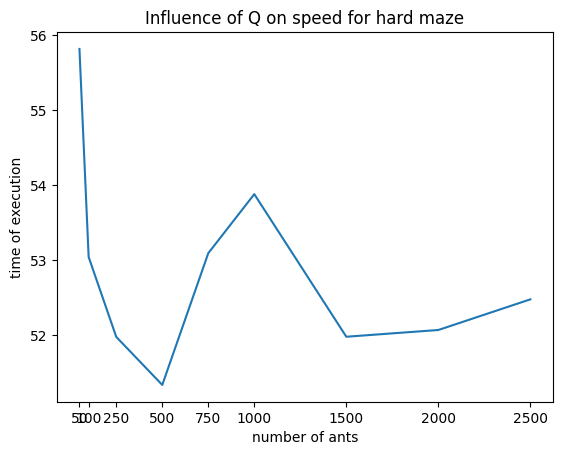

In [4]:
no_ants = 25
no_gen = 25
q = 1000
evap = 0.2
# custom parameters
straight_factor = 1
max_steps = 1000000

mazes = [Maze.create_maze("./../data/easy_maze.txt"), 
         Maze.create_maze("./../data/medium_maze.txt"), 
         Maze.create_maze("./../data/hard_maze.txt")]

specs = [PathSpecification.read_coordinates("./../data/easy_coordinates.txt"), 
         PathSpecification.read_coordinates("./../data/medium_coordinates.txt"), 
         PathSpecification.read_coordinates("./../data/hard_coordinates.txt")]

maze_types = ["easy", "medium", "hard"]

for maze, spec, maze_type in zip(mazes, specs, maze_types):

  best_solutions = []
  times = []

  parameters = [50, 100, 250, 500, 750, 1000, 1500, 2000, 2500]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, param, evap, straight_factor, max_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    best_solutions.append(shortest_route.size())
    times.append((int(round(time.time() * 1000)) - start_time) / 1000.0)

  plt.plot(parameters, best_solutions)
  plt.xticks(parameters);

  plt.xlabel("number of ants")
  plt.ylabel("length of the path")
  plt.title("Influence of Q on performance for " + maze_type + " maze")

  plt.show()

  plt.plot(parameters, times)
  plt.xticks(parameters);

  plt.xlabel("number of ants")
  plt.ylabel("time of execution")
  plt.title("Influence of Q on speed for " + maze_type + " maze")

  plt.show()

Ready reading maze file ./../data/easy_maze.txt
Ready reading maze file ./../data/medium_maze.txt
Ready reading maze file ./../data/hard_maze.txt
easy 0.0
easy 0.1
easy 0.15
easy 0.2
easy 0.25
easy 0.3
easy 0.4
easy 0.5
easy 0.6
easy 0.8
easy 0.9


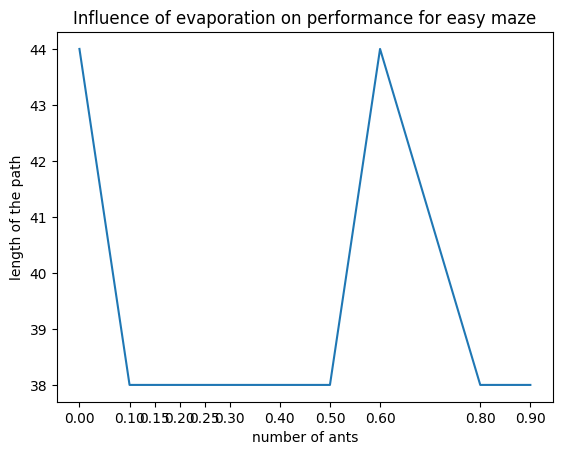

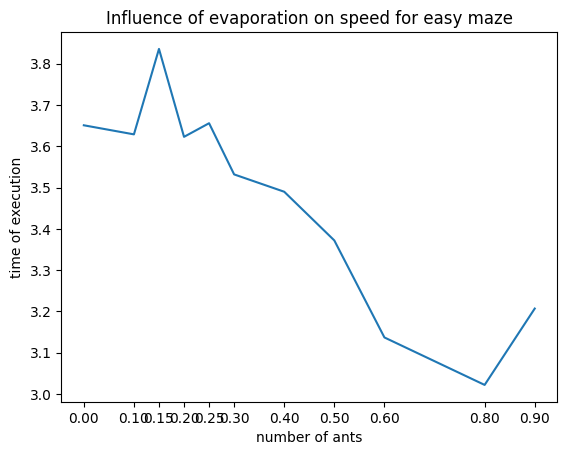

medium 0.0
medium 0.1
medium 0.15
medium 0.2
medium 0.25
medium 0.3
medium 0.4
medium 0.5
medium 0.6
medium 0.8
medium 0.9


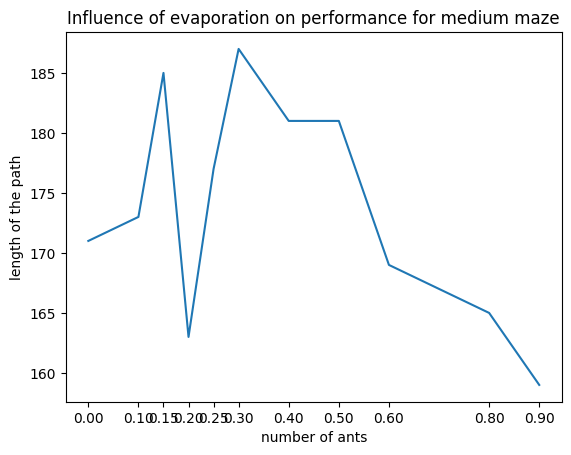

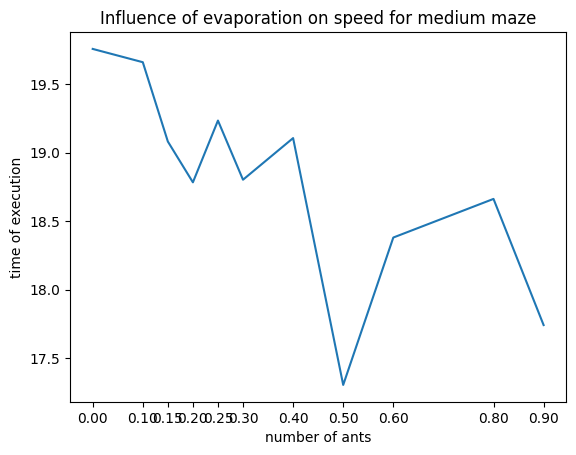

hard 0.0
hard 0.1
hard 0.15
hard 0.2
hard 0.25
hard 0.3
hard 0.4
hard 0.5
hard 0.6
hard 0.8
hard 0.9


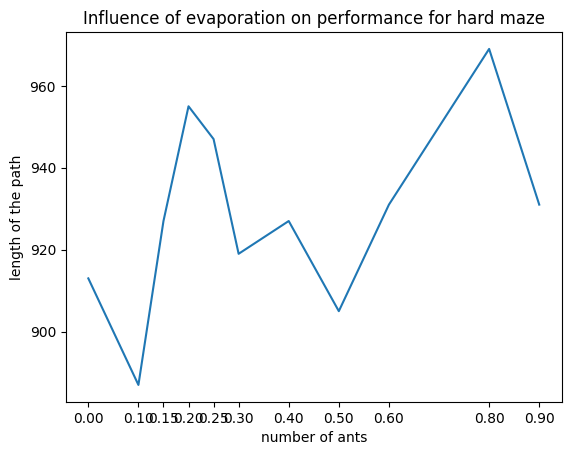

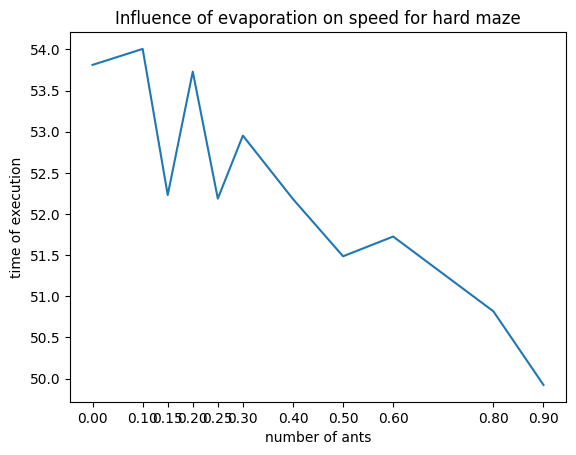

In [5]:
no_ants = 25
no_gen = 25
q = 1000
evap = 0.2
# custom parameters
straight_factor = 1
max_steps = 1000000

mazes = [Maze.create_maze("./../data/easy_maze.txt"), 
         Maze.create_maze("./../data/medium_maze.txt"), 
         Maze.create_maze("./../data/hard_maze.txt")]

specs = [PathSpecification.read_coordinates("./../data/easy_coordinates.txt"), 
         PathSpecification.read_coordinates("./../data/medium_coordinates.txt"), 
         PathSpecification.read_coordinates("./../data/hard_coordinates.txt")]

maze_types = ["easy", "medium", "hard"]

for maze, spec, maze_type in zip(mazes, specs, maze_types):

  best_solutions = []
  times = []

  parameters = [0.0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, q, param, straight_factor, max_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    best_solutions.append(shortest_route.size())
    times.append((int(round(time.time() * 1000)) - start_time) / 1000.0)

  plt.plot(parameters, best_solutions)
  plt.xticks(parameters);

  plt.xlabel("number of ants")
  plt.ylabel("length of the path")
  plt.title("Influence of evaporation on performance for " + maze_type + " maze")

  plt.show()

  plt.plot(parameters, times)
  plt.xticks(parameters);

  plt.xlabel("number of ants")
  plt.ylabel("time of execution")
  plt.title("Influence of evaporation on speed for " + maze_type + " maze")

  plt.show()

Ready reading maze file ./../data/easy_maze.txt
Ready reading maze file ./../data/medium_maze.txt
Ready reading maze file ./../data/hard_maze.txt
easy 0.1
easy 0.2
easy 0.3
easy 0.4
easy 0.5
easy 0.6
easy 0.7
easy 0.8
easy 0.9
easy 1.0
easy 1.1
easy 1.2
easy 1.3
easy 1.4
easy 1.5
easy 1.6
easy 1.7
easy 1.8
easy 1.9
easy 2


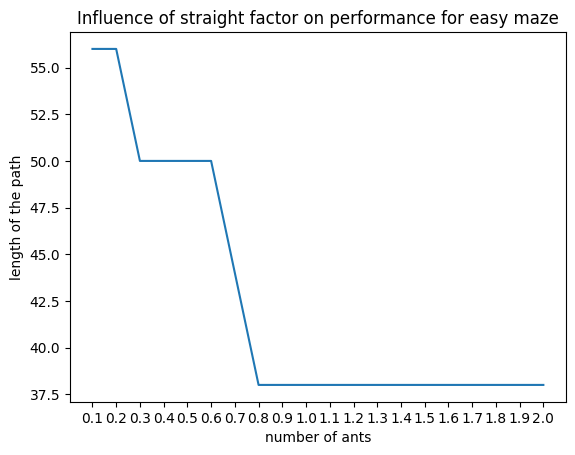

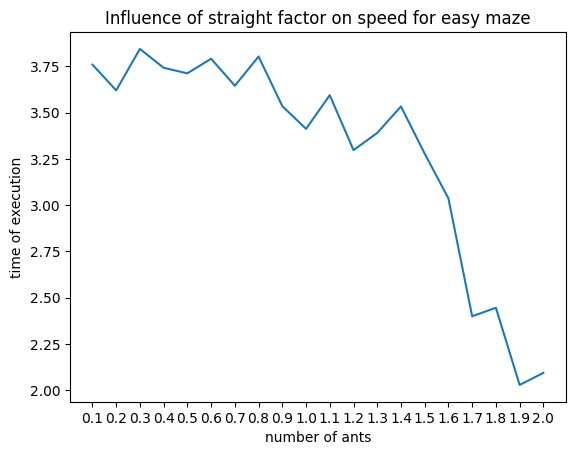

medium 0.1
medium 0.2
medium 0.3
medium 0.4
medium 0.5
medium 0.6
medium 0.7
medium 0.8
medium 0.9
medium 1.0
medium 1.1
medium 1.2
medium 1.3
medium 1.4
medium 1.5
medium 1.6
medium 1.7
medium 1.8
medium 1.9
medium 2


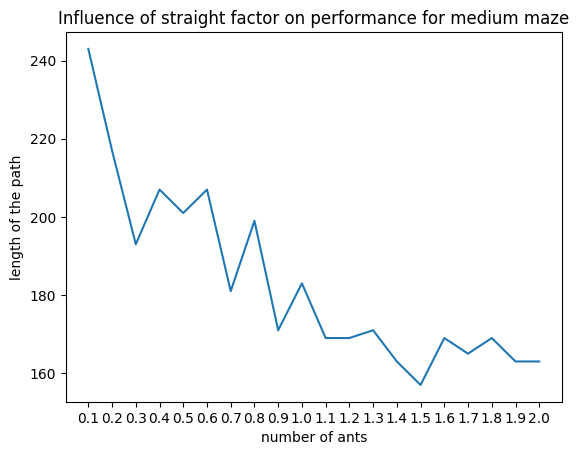

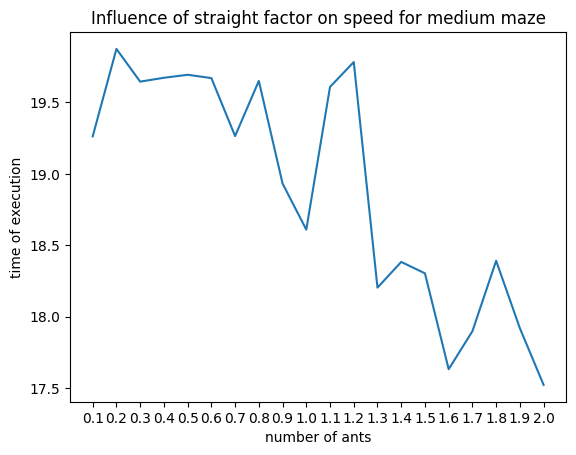

hard 0.1
hard 0.2
hard 0.3
hard 0.4
hard 0.5
hard 0.6
hard 0.7
hard 0.8
hard 0.9
hard 1.0
hard 1.1
hard 1.2
hard 1.3
hard 1.4
hard 1.5
hard 1.6
hard 1.7
hard 1.8
hard 1.9
hard 2


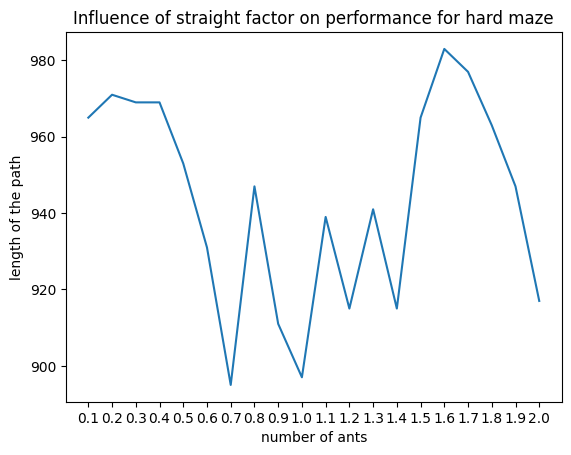

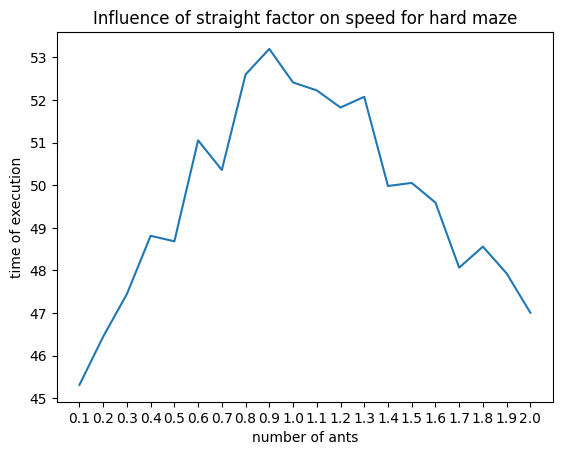

In [6]:
no_ants = 25
no_gen = 25
q = 1000
evap = 0.2
# custom parameters
straight_factor = 1
max_steps = 1000000

mazes = [Maze.create_maze("./../data/easy_maze.txt"), 
         Maze.create_maze("./../data/medium_maze.txt"), 
         Maze.create_maze("./../data/hard_maze.txt")]

specs = [PathSpecification.read_coordinates("./../data/easy_coordinates.txt"), 
         PathSpecification.read_coordinates("./../data/medium_coordinates.txt"), 
         PathSpecification.read_coordinates("./../data/hard_coordinates.txt")]

maze_types = ["easy", "medium", "hard"]

for maze, spec, maze_type in zip(mazes, specs, maze_types):

  best_solutions = []
  times = []

  parameters = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]
  for param in parameters:
    print(maze_type, param)

    start_time = int(round(time.time() * 1000))

    aco = AntColonyOptimization(maze, no_ants, no_gen, q, evap, param, max_steps)
    shortest_route, best_routes, avg_routes = aco.find_shortest_route(spec)

    best_solutions.append(shortest_route.size())
    times.append((int(round(time.time() * 1000)) - start_time) / 1000.0)

  plt.plot(parameters, best_solutions)
  plt.xticks(parameters);

  plt.xlabel("number of ants")
  plt.ylabel("length of the path")
  plt.title("Influence of straight factor on performance for " + maze_type + " maze")

  plt.show()

  plt.plot(parameters, times)
  plt.xticks(parameters);

  plt.xlabel("number of ants")
  plt.ylabel("time of execution")
  plt.title("Influence of straight factor on speed for " + maze_type + " maze")

  plt.show()

### Synthesis

In [ ]:
# Please keep your parameters for the synthesis part easily changeable here
gen = 1
no_gen = 1
q = 1000
evap = 0.1

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")